Report the number Positive samples having Gender =1 and Race =2

># <center> <font color='red'> CMPE428 - DATA SCIENCE </font> </center>
>## <center> <font color='blue'> Assignment 3 - Exploration and Visualization of Data </font>  </center>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Download the dataset “NHANES0910modified.csv” from https://staff.emu.edu.tr/hakanaltincay/Documents/CMPE428/.
The columns named as ClassLabel, Gender, Race, Education, FamilyHistory and HighBloodSugar are categorical and
the others are numerical.

In [12]:
df = pd.read_csv("/content/sample_data/NHANES0910modified.csv")
display(df.head())

,ClassLabel,Gender,Age,Race,Education,FamilyHistory,HighBloodSugar,BMI,WaistCircumference,SystolicBP,DiastolicBP,LDL,HDL,Triglycerides
0,Negative,1,44,3,3.0,1,1,29.10,106.6,119,88,113,37,235
1,Negative,2,44,1,2.0,2,1,25.06,82.3,130,86,138,63,61
2,Negative,1,22,3,5.0,1,1,28.07,94.5,120,87,96,57,111
3,Negative,2,35,3,4.0,1,1,20.29,71.9,110,64,93,89,58
4,Negative,1,54,2,5.0,2,1,36.32,116.4,92,42,110,62,71


Display the top 10 rows of the dataset

In [13]:
print(df.head(10))

  ClassLabel  Gender  Age  Race  Education  FamilyHistory  HighBloodSugar  \
0   Negative       1   44     3        3.0              1               1   
1   Negative       2   44     1        2.0              2               1   
2   Negative       1   22     3        5.0              1               1   
3   Negative       2   35     3        4.0              1               1   
4   Negative       1   54     2        5.0              2               1   
5   Negative       1   54     4        5.0              2               1   
6   Negative       2   25     1        2.0              1               1   
7   Negative       1   80     3        4.0              1               1   
8   Negative       1   49     1        2.0              1               1   
9   Negative       2   37     2        4.0              2               1   

     BMI  WaistCircumference  SystolicBP  DiastolicBP  LDL  HDL  Triglycerides  
0  29.10               106.6         119           88  113   37        

Count and report the number of missing values in each variable

In [14]:
print("Number of missing values in each variable:")
missing_values = df.isnull().sum()
print(missing_values)

Number of missing values in each variable:
ClassLabel             0
Gender                 0
Age                    0
Race                   0
Education             12
FamilyHistory          0
HighBloodSugar         0
BMI                    9
WaistCircumference     0
SystolicBP             0
DiastolicBP            0
LDL                    0
HDL                    0
Triglycerides          0
dtype: int64


Impute the missing values in categorical variables by their most frequent values

In [15]:
print("Descriptive Statistics of the entire DataFrame:")
display(df.describe(include='all'))

Descriptive Statistics of the entire DataFrame:


,ClassLabel,Gender,Age,Race,Education,FamilyHistory,HighBloodSugar,BMI,WaistCircumference,SystolicBP,DiastolicBP,LDL,HDL,Triglycerides
count,1503,1503.000000,1503.000000,1503.000000,1491.000000,1503.000000,1503.000000,1494.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.541583,49.231537,2.766467,3.428571,1.333333,1.025948,28.416365,97.555888,120.359947,68.152362,118.815702,55.480373,117.979375
std,NaN,0.498434,17.646239,1.049072,1.275253,0.471561,0.159033,6.259500,15.358587,17.108261,11.749383,34.656330,16.125324,60.615212
min,NaN,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,14.590000,62.000000,76.000000,24.000000,29.000000,21.000000,26.000000
25%,NaN,1.000000,34.000000,2.000000,3.000000,1.000000,1.000000,24.120000,86.500000,108.000000,61.000000,94.000000,44.000000,75.000000
50%,NaN,2.000000,48.000000,3.000000,4.000000,1.000000,1.000000,27.445000,96.100000,118.000000,68.000000,117.000000,53.000000,103.000000
75%,NaN,2.000000,63.000000,3.000000,4.000000,2.000000,1.000000,31.772500,106.350000,130.000000,76.000000,140.000000,65.000000,146.000000


Impute the missing values in continuous variables by

---

their mean values

---



In [17]:
continuous_vars = ['BMI']
for var in continuous_vars:
    if df[var].isnull().any():
        mean_value = df[var].mean()
        df[var].fillna(mean_value, inplace=True)

print("Number of missing values after imputation:")
print(df.isnull().sum())

Number of missing values after imputation:
ClassLabel             0
Gender                 0
Age                    0
Race                   0
Education             12
FamilyHistory          0
HighBloodSugar         0
BMI                    0
WaistCircumference     0
SystolicBP             0
DiastolicBP            0
LDL                    0
HDL                    0
Triglycerides          0
dtype: int64


Report the number of positive and negative samples in the dataset

In [18]:
positive_samples = df[df['ClassLabel'] == 'Positive'].shape[0]
negative_samples = df[df['ClassLabel'] == 'Negative'].shape[0]

print("number of positive samples")
print(positive_samples)
print("number of negative samples")
print(negative_samples)

number of positive samples
728
number of negative samples
775


Report the number Positive samples having Gender =1 and Race =2

In [19]:
filtered_count = df[
    (df['ClassLabel'] == 'Positive') &
    (df['Gender'] == 1) &
    (df['Race'] == 2)
].shape[0]

print("Number of Positive samples having Gender = 1 and Race = 2:")
print(filtered_count)

Number of Positive samples having Gender = 1 and Race = 2:
40


Which Race value is the most frequent in Negative samples?

In [20]:
negative_samples = df[df['ClassLabel'] == 'Negative']
most_frequent_race = negative_samples['Race'].mode()[0]
race_counts = negative_samples['Race'].value_counts()
most_frequent_count = race_counts.iloc[0]
print("Most frequent Race value in Negative samples:")
print(f"Race Value: {most_frequent_race}")
print(f"Count: {most_frequent_count}")

Most frequent Race value in Negative samples:
Race Value: 3
Count: 404


What is the average BMI value of the samples having Education =3?

In [23]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

filtered_samples = df[df['Education'] == 3]


average_bmi = filtered_samples['BMI'].mean()

print("Average BMI value for samples having Education = 3:")
print(average_bmi)

Average BMI value for samples having Education = 3:
29.276166255235008


Compute the mean and standard deviation of BMI values for Gender = 1

In [24]:
gender_1_samples = df[df['Gender'] == 1]

mean_bmi = gender_1_samples['BMI'].mean()
std_bmi = gender_1_samples['BMI'].std()

print("BMI Mean and Standard Deviation for Gender = 1 samples:")
print(f"Mean BMI: {mean_bmi:.4f}")
print(f"Standard Deviation of BMI: {std_bmi:.4f}")

BMI Mean and Standard Deviation for Gender = 1 samples:
Mean BMI: 28.4977
Standard Deviation of BMI: 5.6428


For the WaistCircumference, compute a pair of boxplots, one for each class (Positive or Negative) specified in the first column of the dataset.

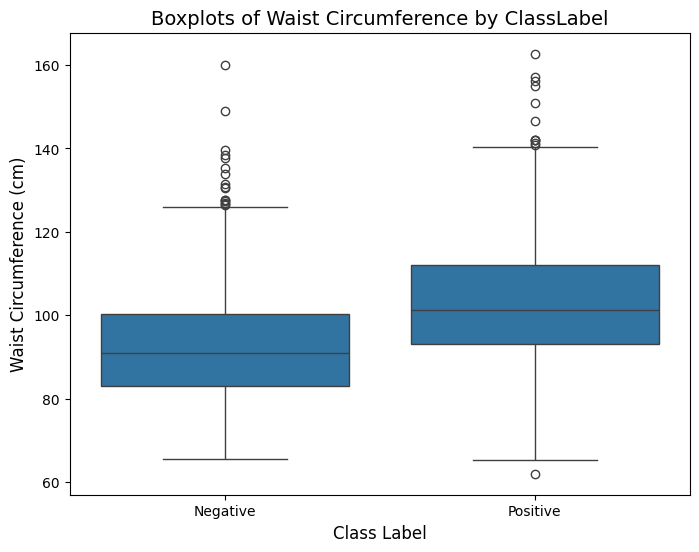

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ClassLabel', y='WaistCircumference', data=df)

plt.title('Boxplots of Waist Circumference by ClassLabel', fontsize=14)
plt.xlabel('Class Label', fontsize=12)
plt.ylabel('Waist Circumference (cm)', fontsize=12)

plt.show()

Using the "quantile" method, print quartile information for BMI. Verify your results using the describe() method

In [26]:

quartiles = df['BMI'].quantile([0.25, 0.5, 0.75])

print("BMI Quartiles (using quantile() method):")
print(quartiles)
print("\n")

describe_bmi = df['BMI'].describe()
print("BMI Verification (using describe() method):")
print(describe_bmi)

BMI Quartiles (using quantile() method):
0.25    24.160
0.50    27.500
0.75    31.715
Name: BMI, dtype: float64


BMI Verification (using describe() method):
count    1503.000000
mean       28.416365
std         6.240718
min        14.590000
25%        24.160000
50%        27.500000
75%        31.715000
max        57.940000
Name: BMI, dtype: float64


For the Education variable in the dataset, compute the bar-plots for different categories. The bar-plots should present the number of samples having each particular value.

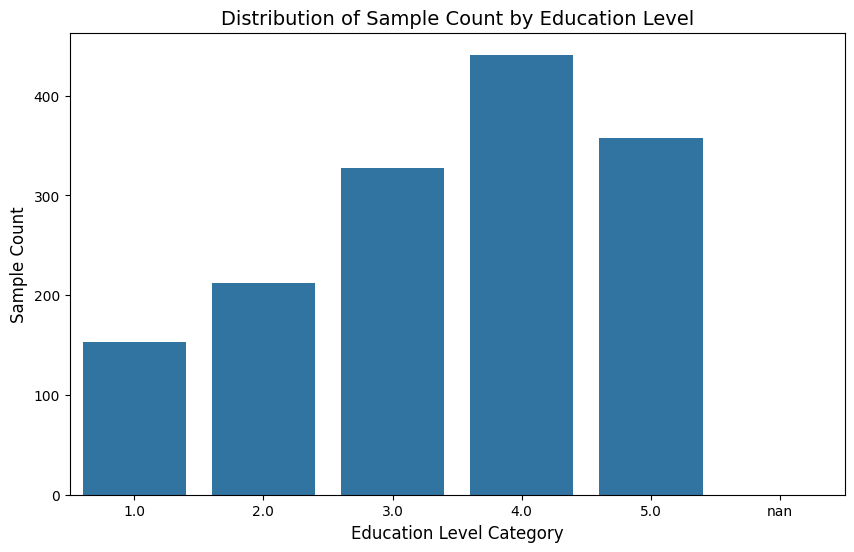

In [32]:
education_order = sorted(df['Education'].unique())


plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df, order=education_order)


plt.title('Distribution of Sample Count by Education Level', fontsize=14)
plt.xlabel('Education Level Category', fontsize=12)
plt.ylabel('Sample Count', fontsize=12)

plt.show()

For BMI and WaistCircumference, compute a scatter plot. Comment on the relation between the two variables

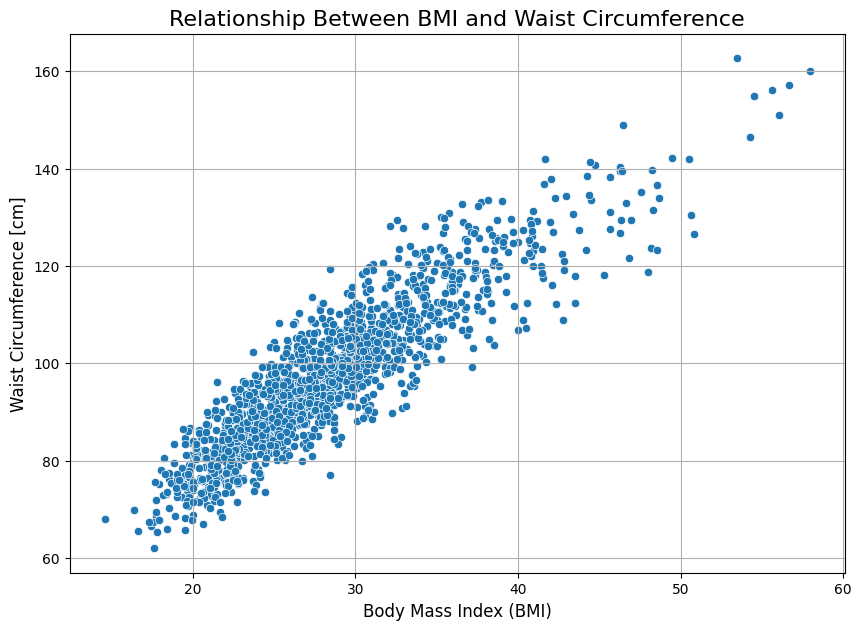

In [31]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='BMI', y='WaistCircumference', data=df)

plt.title('Relationship Between BMI and Waist Circumference', fontsize=16)
plt.xlabel('Body Mass Index (BMI)', fontsize=12)
plt.ylabel('Waist Circumference [cm]', fontsize=12)
plt.grid(True)

plt.show()

For SystolicBP and Triglycerides, compute a scatter plot. Comment on the relation between the two variables

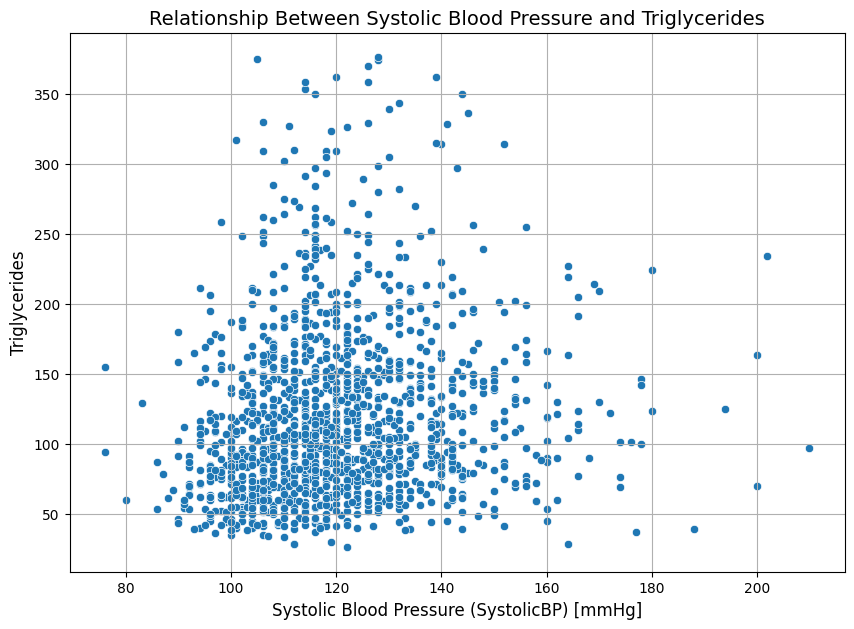

In [30]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='SystolicBP', y='Triglycerides', data=df)

plt.title('Relationship Between Systolic Blood Pressure and Triglycerides', fontsize=14)
plt.xlabel('Systolic Blood Pressure (SystolicBP) [mmHg]', fontsize=12)
plt.ylabel('Triglycerides', fontsize=12)
plt.grid(True)

plt.show()